In [1]:
import atlite
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader
from matplotlib.gridspec import GridSpec
import seaborn as sns
import geopandas as gpd

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
cutout = atlite.Cutout(path="western-europe-2011-01.nc",
                       module="era5",
                       x=slice(-13.6913, 1.7712),
                       y=slice(49.9096, 60.8479),
                       time="2011-01",
                       #features = ["wave_height"]
                       )
cutout.data

c:\Users\felix\Documents\PythonScripts\atlitewec\atlite\cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


Text(0.5, 1.0, 'WEC device power matrix')

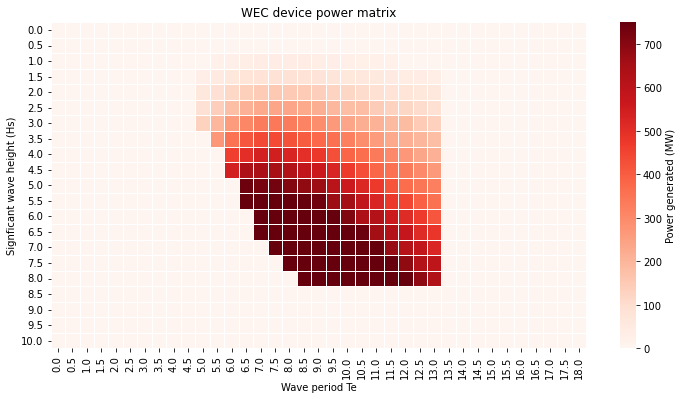

In [167]:
#Defining power matrix: lrows:wave height (Hs), Columns Wave period (Te)
power_matrix = pd.read_excel("PowerMatrix_PyPsa.xlsx", header = 2, usecols= "C:AN", index_col=0)
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(power_matrix, 
            annot =False, 
            linewidths = 0.5, 
            ax=ax, 
            cmap = 'Reds', 
            cbar_kws = {'label':'Power generated (MW)'})
plt.xlabel ('Wave period Te')
plt.ylabel ('Signficant wave height (Hs)')
plt.title ('WEC device power matrix')

In [97]:
generation = power_matrix.loc[5, 11]
generation

472

In [162]:
#Individual Dataarrays
wave_height =cutout.data.wave_height
wave_period =cutout.data.wave_period
wave_period[0][0].values

# Round up to the next heights 0.5 in new Data arrays
Hs = np.ceil(wave_height*2)/2
Te = np.ceil(wave_period*2)/2
Hs.dims,Hs.shape, Te.dims, Te.shape

(('time', 'y', 'x'), (744, 44, 62), ('time', 'y', 'x'), (744, 44, 62))

Text(0.5, 1.0, 'WEC device power matrix')

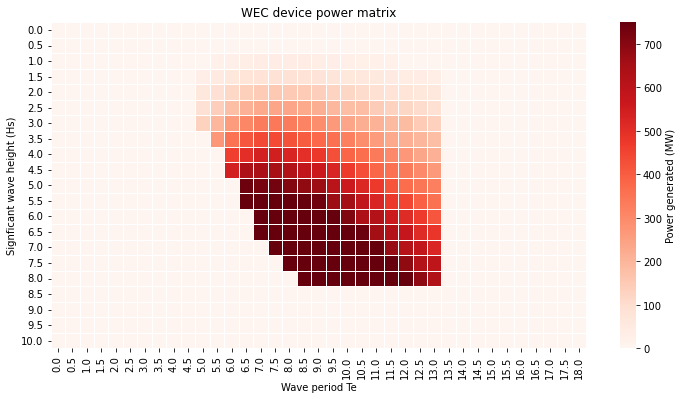

In [129]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(power_matrix, 
            annot =False, 
            linewidths = 0.5, 
            ax=ax, 
            cmap = 'Reds', 
            cbar_kws = {'label':'Power generated (MW)'})
plt.xlabel ('Wave period Te')
plt.ylabel ('Signficant wave height (Hs)')
plt.title ('WEC device power matrix')

In [145]:
power_matrix.loc[6.5,9.5]

750

In [250]:
#Creating empty xarray with same dimensions
power_test = xr.DataArray.copy(Hs)
power_test[:] = np.nan
power_test = power_test.rename('Generated Power')
power_test.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [252]:
power_test.shape, Hs.shape, Te.shape
#print((Hs.x.values))

((744, 44, 62), (744, 44, 62), (744, 44, 62))

In [253]:
for x in power_test.x.values:
    print (x)
    for y in power_test.y.values:
        
        for t in power_test.time.values:
            #print (t, x, y)
            Hs_ind= Hs.sel(x=x, y=y, time=t).values 
            Te_ind = Te.sel(x=x, y=y, time=t).values 

            if np.isnan(Hs_ind) or np.isnan(Te_ind):
                power = np.nan
            else:
                power =power_matrix.loc[Hs_ind, Te_ind]

            print (t, x, y)
            print (Hs_ind, Te_ind, power)            
            power_test.loc[dict(x= x, y= y,time = t )] = power
            #print (Hs_ind, Te_ind, power)

-13.5
2011-01-01T00:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T01:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T02:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T03:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T04:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T05:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T06:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T07:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T08:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T09:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T10:00:00.000000000 -13.5 50.0
3.0 15.5 0
2011-01-01T11:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-01-01T12:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-01-01T13:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-01-01T14:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-01-01T15:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-01-01T16:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-01-01T17:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-01-01T18:00:00.000000000 -13.5 50.0
3.0 15.0 0
2011-0

KeyboardInterrupt: 

In [259]:
power_test[0,0,0].values

RecursionError: maximum recursion depth exceeded while calling a Python object

In [72]:
###Index
# Hs_test[0][0].values,
Hs.isel(x=0, y=0, time=0).values

##Name
# z = Hs.sel(x=-10, y=50, time ='2011-01-01T00:00:00.000000000').values
# y = Te.sel(x=-10, y=50, time ='2011-01-01T00:00:00.000000000').values
#Hs_test.sel(x=-13.5, y=50).values

array(3., dtype=float32)

In [183]:
x= Hs.isel(x=45, y=0, time=0).values 
y = Te.isel(x=45, y=0, time=0).values
z = power_matrix.loc[x, y]
x, y , z

(array(1.5, dtype=float32), array(5.5, dtype=float32), 50)

In [184]:
power_test[0, 0, 0] = power_matrix.loc[x, y]
power_test.values

KeyboardInterrupt: 

In [202]:
p_test[:] = 0
p_test.loc[dict(x=-4, y=50.25,time ='2011-01-01T00:00:00.000000000' )] = np.nan

p_test.values

array([[[ 0.,  0.,  0.],
        [nan,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]], dtype=float32)

In [193]:
f= power_test.sel(x= -13.25, y= 50,  time ='2011-01-01T00:00:00.000000000').values
f
p_test.dims

('time', 'y', 'x')

In [211]:
l=np.nan
np.isnan(l)

True

In [261]:


Hs_test = Hs[0:3, 0:3, 38:41]
Te_test = Te[0:3, 0:3, 38:41]

p_test = xr.DataArray.copy(Hs_test)
p_test[:] = np.nan
p_test = power_test.rename('Generated Power')
p

#Hs_test.values


NameError: name 'p' is not defined

In [248]:
#test

for x in p_test.x.values:
    
    for y in p_test.y.values:
        
        for t in p_test.time.values:
            
            Hs_ind= Hs_test.sel(x=x, y=y, time=t).values 
            Te_ind = Te_test.sel(x=x, y=y, time=t).values
            if np.isnan(Hs_ind) or np.isnan(Te_ind):
                power = np.nan
            else:
                power =power_matrix.loc[Hs_ind, Te_ind]

            p_test.loc[dict(x= x, y= y,time = t )] = power
            print (t, x, y)
            print (Hs_ind, Te_ind, power)
p_test.values

2011-01-01T00:00:00.000000000 -4.0 50.0
1.5 6.0 65
2011-01-01T01:00:00.000000000 -4.0 50.0
1.5 6.0 65
2011-01-01T02:00:00.000000000 -4.0 50.0
1.5 6.0 65
2011-01-01T00:00:00.000000000 -4.0 50.25
nan nan nan
2011-01-01T01:00:00.000000000 -4.0 50.25
nan nan nan
2011-01-01T02:00:00.000000000 -4.0 50.25
nan nan nan
2011-01-01T00:00:00.000000000 -4.0 50.5
nan nan nan
2011-01-01T01:00:00.000000000 -4.0 50.5
nan nan nan
2011-01-01T02:00:00.000000000 -4.0 50.5
nan nan nan
2011-01-01T00:00:00.000000000 -3.75 50.0
1.5 6.0 65
2011-01-01T01:00:00.000000000 -3.75 50.0
1.5 6.0 65
2011-01-01T02:00:00.000000000 -3.75 50.0
1.5 6.0 65
2011-01-01T00:00:00.000000000 -3.75 50.25
nan 6.0 nan
2011-01-01T01:00:00.000000000 -3.75 50.25
nan 6.0 nan
2011-01-01T02:00:00.000000000 -3.75 50.25
nan 5.5 nan
2011-01-01T00:00:00.000000000 -3.75 50.5
nan 6.0 nan
2011-01-01T01:00:00.000000000 -3.75 50.5
nan 6.0 nan
2011-01-01T02:00:00.000000000 -3.75 50.5
nan 5.5 nan
2011-01-01T00:00:00.000000000 -3.5 50.0
1.5 6.0 65
2011

array([[[65., 65., 65.],
        [nan, nan, 65.],
        [nan, nan, 29.]],

       [[65., 65., 65.],
        [nan, nan, 65.],
        [nan, nan, 29.]],

       [[65., 65., 65.],
        [nan, nan, 22.],
        [nan, nan, 22.]]], dtype=float32)

In [ ]:
power_test[0].values

In [198]:
power_test.loc[dict{x = 0, y = 1}] =1

SyntaxError: invalid syntax (2201969333.py, line 1)

In [18]:
#power_test.sel(x=-13)
#power_test.loc[dict(x = -13)]


#Calling a single item and trying to use it in the matrix
z = Hs.sel(x=-10, y=50, time ='2011-01-01T00:00:00.000000000').values
y = Te.sel(x=-10, y=50, time ='2011-01-01T00:00:00.000000000').values


x =power_matrix.loc[z,y]
x

0

In [255]:
power_test.values

array([[[ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan],
        [ 0., nan, nan, ..., nan, nan, nan

In [141]:
power = power_matrix.loc[[Hs], [Te]]

ValueError: Index data must be 1-dimensional

In [334]:
def get_gen(ds, power_matrix):
    Hs= ds['wave_height']
    Te= ds['wave_period']
    power_mat =power_matrix
    power = power_mat.loc[[Hs], [Te]]
    return power

#test = get_gen(ds, power_matrix)
test = xr.apply_ufunc(get_gen, ds, power_matrix, dask="parallelized",output_dtypes=[Hs.dtype])

ValueError: exact match required for all data variable names, but dict_keys([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0]) != KeysView(Frozen({'wave_height': <xarray.Variable (time: 744, y: 44, x: 62)>
dask.array<truediv, shape=(744, 44, 62), dtype=float32, chunksize=(100, 44, 62), chunktype=numpy.ndarray>, 'wave_period': <xarray.Variable (time: 744, y: 44, x: 62)>
dask.array<truediv, shape=(744, 44, 62), dtype=float32, chunksize=(100, 44, 62), chunktype=numpy.ndarray>}))

In [316]:
ds

ds=ds.assign(power = power_matrix.iloc[ds['wave_height']])

IndexError: positional indexers are out-of-bounds

In [264]:
x= np.asarray(power_matrix)
#x = power_matrix.values(2.5, 10)
x[8][14]

i, j= np.where(x == 750)
i, j




array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22,  29,
         34,  37,  38,  38,  37,  35,  32,  29,  26,  23,  21,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,  50,  65,
         76,  83,  86,  86,  83,  78,  72,  65,  59,  53,  47,  42,  37,
         33,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  57,  88, 115,
        136, 148, 153, 152, 147, 138, 127, 118, 104,  93,  83,  74,  66,
         59,  

In [273]:
waveperiod_index =np.arange(0,18.5,0.5)
i = np.where (waveperiod_index == 18)
i

(array([36], dtype=int64),)

In [189]:
ds.wave_height.values

array([[[3. , 3. , 3. , ..., nan, nan, nan],
        [3. , 3. , 3. , ..., 0.5, nan, nan],
        [3. , 3. , 3. , ..., 0.5, nan, nan],
        ...,
        [4. , 4. , 4. , ..., 7. , 7. , 7. ],
        [4. , 4. , 4. , ..., 7. , 7.5, 7.5],
        [4.5, 4.5, 4.5, ..., 7.5, 7.5, 7.5]],

       [[3. , 3. , 3. , ..., nan, nan, nan],
        [3. , 3. , 3. , ..., 0.5, nan, nan],
        [3. , 3. , 3. , ..., 0.5, nan, nan],
        ...,
        [4. , 4. , 4. , ..., 7. , 7. , 7. ],
        [4. , 4.5, 4.5, ..., 7. , 7. , 7. ],
        [4.5, 4.5, 4.5, ..., 7. , 7. , 7.5]],

       [[3. , 3. , 3. , ..., nan, nan, nan],
        [3. , 3. , 3. , ..., 0.5, nan, nan],
        [3. , 3. , 3. , ..., 0.5, nan, nan],
        ...,
        [4.5, 4.5, 4.5, ..., 6.5, 6.5, 6.5],
        [4.5, 4.5, 4.5, ..., 7. , 7. , 7. ],
        [4.5, 4.5, 4.5, ..., 7. , 7. , 7. ]],

       ...,

       [[4. , 4. , 4. , ..., nan, nan, nan],
        [4. , 4. , 4. , ..., 0.5, nan, nan],
        [4. , 4. , 4. , ..., 0.5, nan, nan

In [17]:
for i, j in enumerate(power_matrix):
    if j == 18:
        print(i,j)

36 18.0
